In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, r2_score, f1_score, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from matplotlib import pyplot as plt
from modeling import optimize
from itertools import product

In [2]:
df = pd.read_csv('data/processed/clean_and_filled.csv')

Training models...: 100%|██████████| 4/4 [00:00<00:00, 36.43it/s]


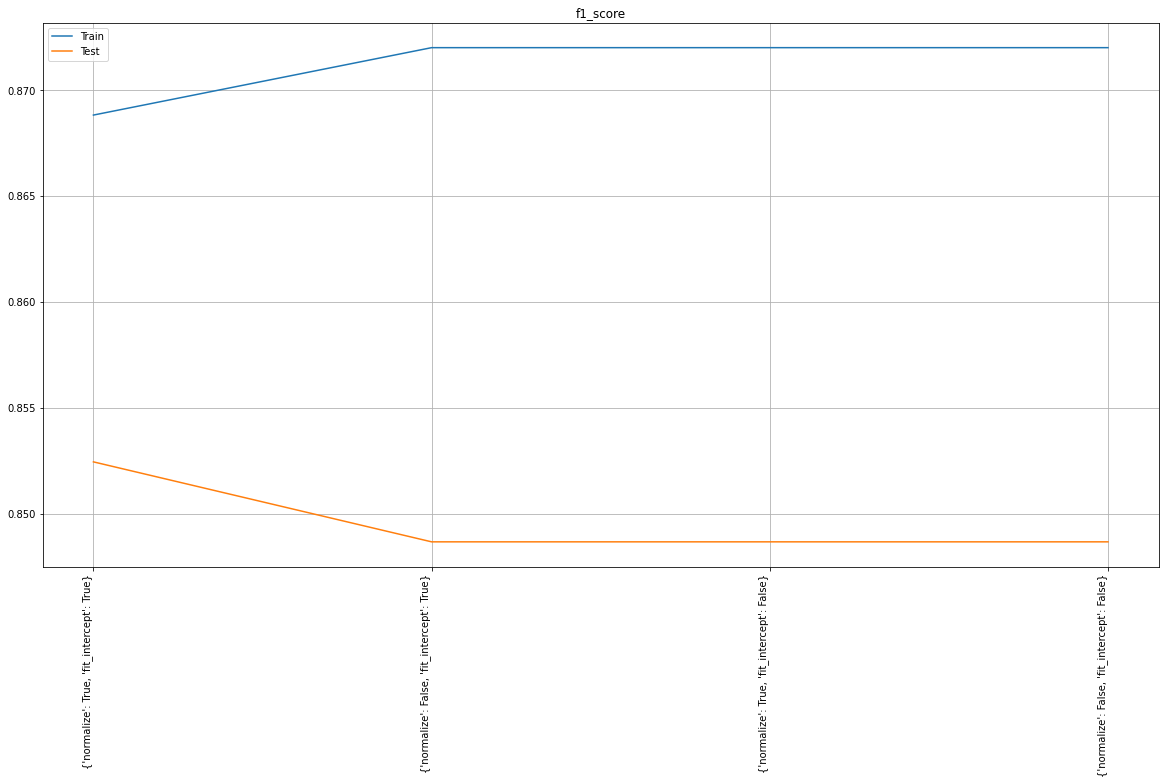

{'f1_score': 0.8524590163934427, 'accuracy_score': 0.8333333333333334, 'precision_score': 0.8227848101265823, 'recall_score': 0.8843537414965986}
{'normalize': True, 'fit_intercept': True}


In [3]:
test_size = 0.3
linear_model, linear_res, linear_best_score, linear_best_params = optimize(df, test_size, model_constructor=LinearRegression, param_list=[{'normalize': True, 'fit_intercept': True},
                                                {'normalize': False, 'fit_intercept': True},
                                                {'normalize': True, 'fit_intercept': False},
                                                {'normalize': False, 'fit_intercept': False}])

print(linear_best_score)
print(linear_best_params)

Training models...: 100%|██████████| 120/120 [00:25<00:00,  4.70it/s]


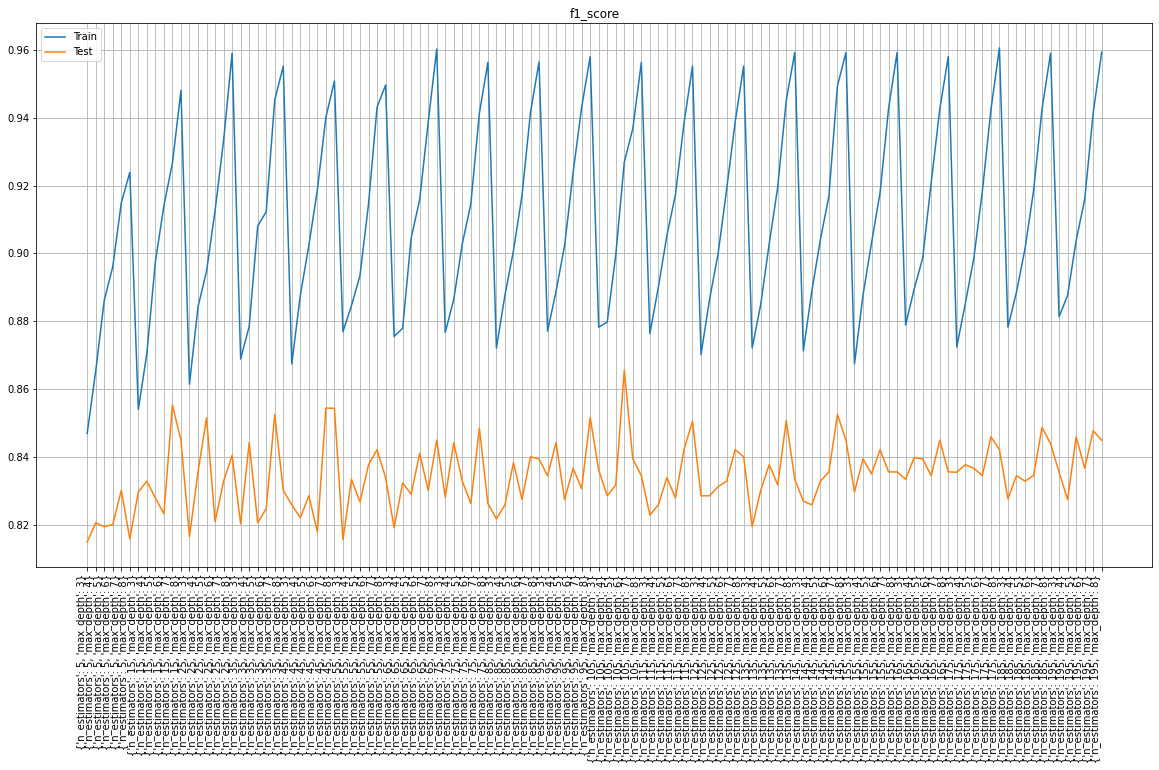

{'f1_score': 0.8655737704918033, 'accuracy_score': 0.8481481481481481, 'precision_score': 0.8354430379746836, 'recall_score': 0.8979591836734694}
{'n_estimators': 105, 'max_depth': 6}


In [4]:
rf_params = [{'n_estimators': n, 'max_depth': d} for n, d in product(np.arange(5, 201, 10), np.arange(3, 9))]
rf_model, rf_result, rf_best_score, rf_best_params = optimize(df, test_size, model_constructor=RandomForestClassifier, param_list=rf_params)

print(rf_best_score)
print(rf_best_params)

Training models...: 100%|██████████| 120/120 [01:14<00:00,  1.61it/s]


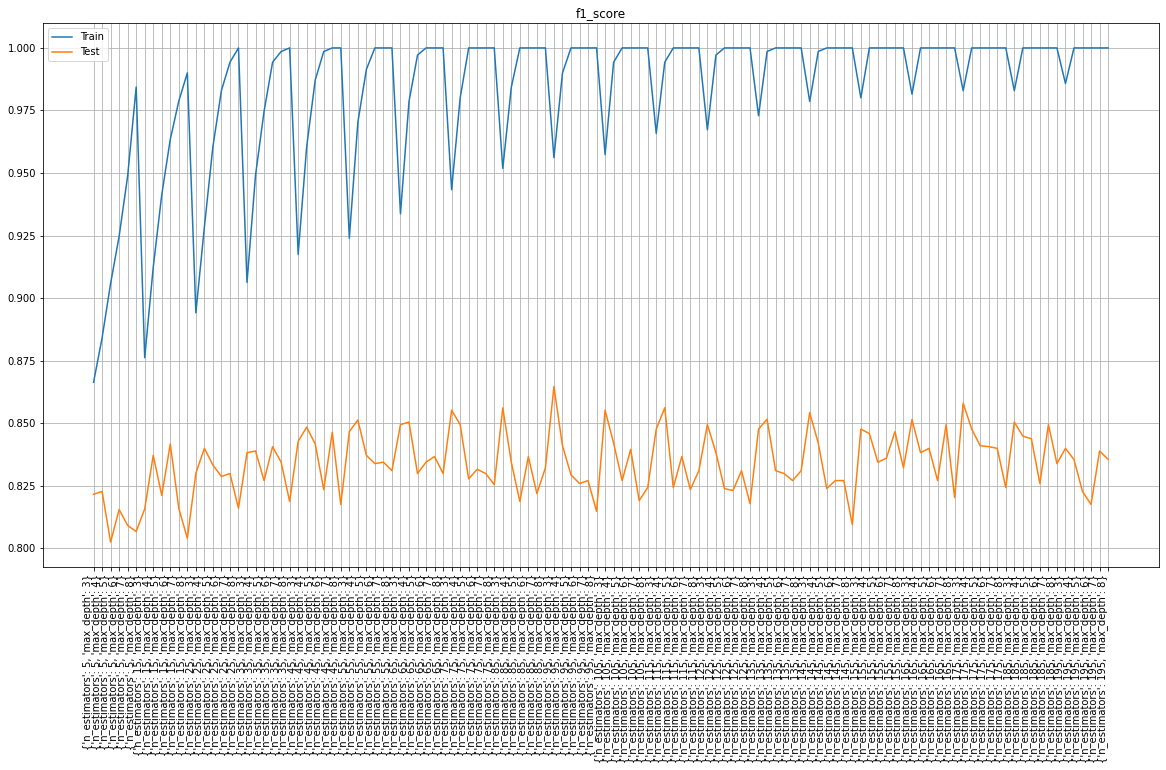

{'f1_score': 0.8646864686468646, 'accuracy_score': 0.8481481481481481, 'precision_score': 0.8397435897435898, 'recall_score': 0.891156462585034} {'n_estimators': 95, 'max_depth': 3}


In [5]:
gb_params = [{'n_estimators': n, 'max_depth': d} for n, d in product(np.arange(5, 201, 10), np.arange(3, 9))]
gb_model, gb_result, gb_best_score, gb_best_params = optimize(df, test_size, model_constructor=GradientBoostingClassifier, param_list=gb_params)
print(gb_best_score, gb_best_params)


                    linear  random_forest  gradient_boost
f1_score         85.245902      86.557377       86.468647
accuracy_score   83.333333      84.814815       84.814815
precision_score  82.278481      83.544304       83.974359
recall_score     88.435374      89.795918       89.115646


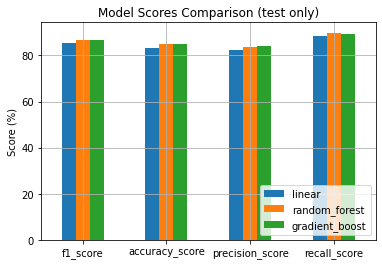

In [6]:
model_scores = pd.DataFrame([linear_best_score, rf_best_score, gb_best_score], index=['linear', 'random_forest', 'gradient_boost']).T
print(model_scores * 100)
(model_scores * 100).plot.bar()
plt.title('Model Scores Comparison (test only)')
plt.ylabel('Score (%)')
plt.grid('on')
plt.xticks(rotation=0)
plt.legend(loc=4)
plt.savefig('data/results/model_scores.png')

In [7]:
from joblib import dump, load
dump(gb_model, 'data/results/gb_full-features_model.joblib')

['data/results/gb_full-features_model.joblib']

In [8]:
imp_df = pd.DataFrame(index=df.drop('target', axis=1).columns, data=zip(rf_model.feature_importances_, gb_model.feature_importances_, linear_model.coef_.reshape(-1)), columns=['rf_importance', 'gb_importance', 'linear_coef'])

In [9]:
imp_df.sort_values('gb_importance', ascending=False)

,rf_importance,gb_importance,linear_coef
cp_type_no_pain,0.107432,0.278070,-7.031708e+12
vessels_colored,0.053372,0.083024,1.342676e-01
st_dep,0.087250,0.072895,9.337735e-02
age,0.043743,0.067653,2.130027e-03
met,0.045278,0.056330,-9.401764e-04
thalium_stress_result_reversible,0.010353,0.039549,3.962501e+11
cp_type_atypical_angina,0.044653,0.038748,-7.031708e+12
ex_angina,0.057704,0.036968,9.634476e-02
heart_rate_peak,0.056169,0.032190,-1.148652e-03
ex_duration,0.034084,0.030751,7.404572e-03
